# praProcess **section**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
#Importing all the necessary libraries for image processing
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from keras.preprocessing.image import ImageDataGenerator

In [4]:
os.getcwd()

'c:\\Users\\TOBI\\Downloads\\project-skripsi\\src'

## Folds.csv

1. Folds.csv contains all the information about the patient images.
2. Folds.csv consists of the magnifying factor of the image. the exact path where the image is stores.
3. So, We can extract useful information from the filename.
4. Here Folds.csv plays major role in designing the system.

In [5]:
# Loading the text file
fold_df = pd.read_csv("../Folds.csv")
fold_df.head(5)

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


In [6]:
fold_df.shape

(39545, 4)

In [7]:
# Defining the paths
img_path = "./BreaKHis_v1/"
classes = ["benign","malign"]

In [8]:
# Renaming the column filename to path
fold_df = fold_df.rename(columns = {"filename":"path"})
# Printing the head of the file
fold_df.head(3)

,fold,mag,grp,path
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


In [9]:
# One example path is printed
fold_df['path'][1]

'BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png'

## Info path:

- From the path column we can extract the exact file name using apply and split functions on the path column.
- And also the class is extracted.

In [10]:
# Extracting the filename and label from the path column
fold_df['filename'] = fold_df['path'].apply(lambda x:x.split("/")[-1])
fold_df["label"] = fold_df['path'].apply(lambda x: x.split("/")[3])

In [11]:
fold_df.head(3)

,fold,mag,grp,path,filename,label
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign


Creating New Directiory Cancer

- The given data consists of very complex structure of folders where it stores the images.
- The structure as follows:
  - BreaKHis_v1
    - histology_slides
      - breast
        - benign
          - SOB
            - Type - patient_id
            - 40x - 100x - 200x - 400x
        - malignant
          - SOB
            - Type - patient_id
            - 40x - 100x - 200x - 400x
- To make things simple, using the exact path of the images, all the images are moved to the common folder called Cancer.
- Images are renamed with their class and patient_id.


In [ ]:
# Creating new directory
os.makedirs("../Cancer/")

In [23]:
# Moving all the images to one folder
for p in fold_df['path']:
    src = "../" + p
    dest = "../Cancer/"
    #saving the files with its corresponding class and patient_id
    dest = os.path.join(dest, src.split("/")[7] +  "_" + src.split("/")[-1])
    shutil.copyfile(src, dest) 

total must be 7909

In [12]:
# Checking the len
len(os.listdir("../Cancer/"))

7909

In [13]:
# Creating a new data frame with labels and file names stored in single folder
fold_df['file_loc'] = fold_df['label'] + "_" + fold_df['filename']
# Encoding the class to integer
fold_df['class'] = fold_df['label'].apply(lambda x: 0 if x =='benign' else 1)

In [15]:
# Printing the head to display the changed made
fold_df.head(3)

,fold,mag,grp,path,filename,label,file_loc,class
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,benign_SOB_B_A-14-22549AB-100-001.png,0
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,benign_SOB_B_A-14-22549AB-100-002.png,0
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,benign_SOB_B_A-14-22549AB-100-003.png,0


In [16]:
fold_df.tail(3)

,fold,mag,grp,path,filename,label,file_loc,class
39542,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,SOB_M_PC-15-190EF-400-013.png,malignant,malignant_SOB_M_PC-15-190EF-400-013.png,1
39543,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,SOB_M_PC-15-190EF-400-014.png,malignant,malignant_SOB_M_PC-15-190EF-400-014.png,1
39544,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,SOB_M_PC-15-190EF-400-015.png,malignant,malignant_SOB_M_PC-15-190EF-400-015.png,1


In [17]:
print(fold_df.shape)

(39545, 8)


sum_benign    :  2480
sum_malignant :  5429


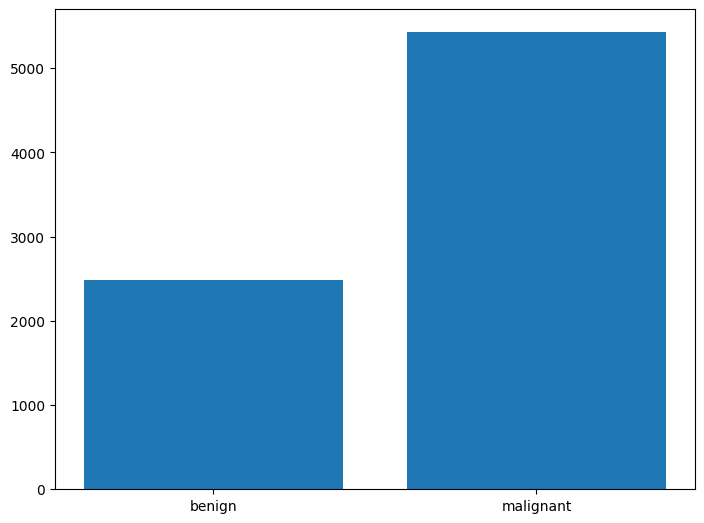

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label_data = ['benign', 'malignant']
sum_benign = fold_df[(fold_df["class"] == 0) & (fold_df["fold"] == 1)].shape[0]
sum_malignant = fold_df[(fold_df["class"] == 1) & (fold_df["fold"] == 1)].shape[0]
print("sum_benign    : ", sum_benign)
print("sum_malignant : ", sum_malignant)
y_bar = [sum_benign, sum_malignant]
ax.bar(label_data, y_bar)
plt.show()

- Data is Highly Imabalanced as this is the case with the real world.
- Medical datas are usually imbalanced because of their nature.

In [20]:
# Filtering the data frame to benign and malignant for visualization
benign_df = fold_df[fold_df['label'] == 'benign']
malignant_df = fold_df[fold_df['label'] == 'malignant']

In [32]:
# Creating a new data frame with the file loc as its index, label and class of the patients as its columns.
df = pd.DataFrame(os.listdir("../Cancer/"))
df = df.rename(columns = {0:'file_loc'})
df['label'] = df['file_loc'].apply(lambda x:x.split("_")[0])
df['class'] = df['label'].apply(lambda x: 0 if x =='benign' else 1)
df.set_index("file_loc",inplace=True)

In [33]:
#Checking the data frame
df.head(2)

,label,class
file_loc,,
SOB_B_A_14-22549AB_SOB_B_A-14-22549AB-100-001.png,SOB,1
SOB_B_A_14-22549AB_SOB_B_A-14-22549AB-100-002.png,SOB,1


In [31]:
df.tail(2)

,label,class
file_loc,,
SOB_M_PC_15-190EF_SOB_M_PC-15-190EF-400-014.png,SOB,1
SOB_M_PC_15-190EF_SOB_M_PC-15-190EF-400-015.png,SOB,1


Using the data frame, the splitting for train, test and validation is done.
according to the research proposal plan, the distribution of the proportion of data is 
- 80%, 15%, 5% of training, test, and validation data

In [24]:
data_train_and_val, data_test = train_test_split(df, test_size = 0.15, random_state = 47)
#Traing and val
data_train, data_val = train_test_split(data_train_and_val, test_size = 0.05, random_state = 47)

In [25]:
print("Training size :", data_train.shape)
print("Validation size :", data_val.shape)
print("Testing size :", data_test.shape)

Training size : (6385, 2)
Validation size : (337, 2)
Testing size : (1187, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

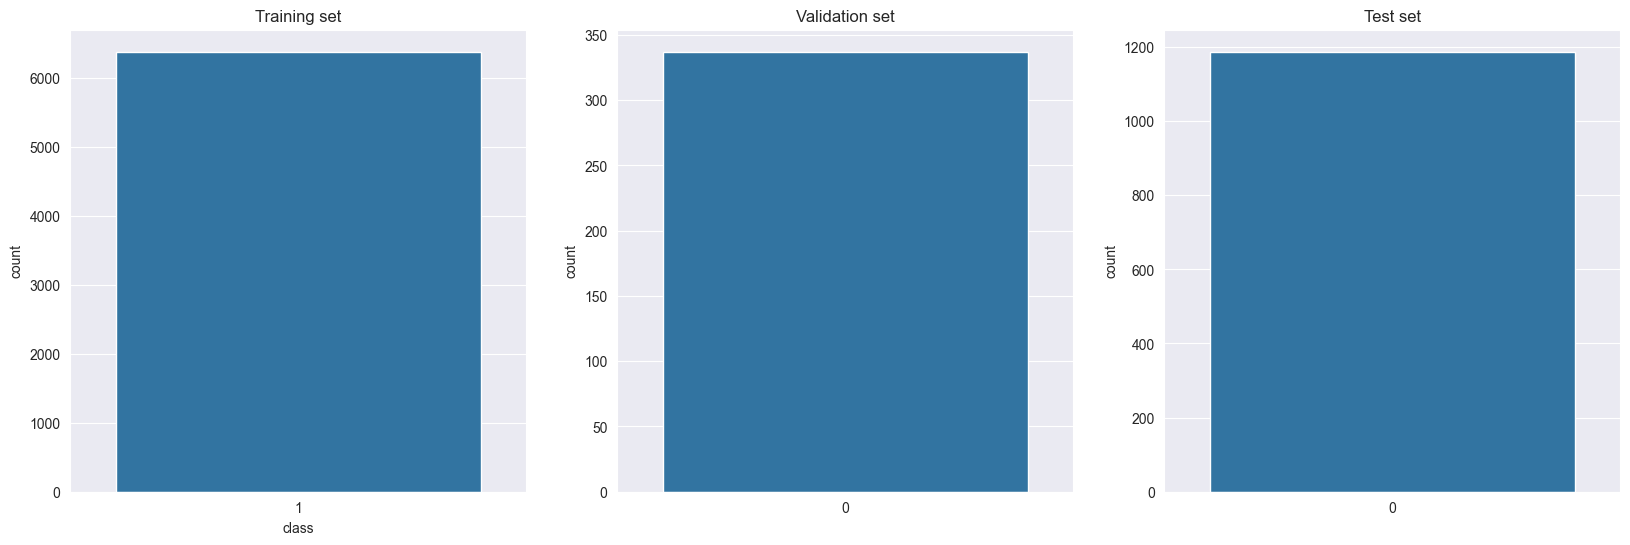

In [30]:
#Plotting
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot( x=data_train["class"])
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(data_val['class'])
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(data_test['class']);
plt.title("Test set");
plt.show